In [127]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer, util
from scipy.spatial import cKDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import pickle
import re
from utils.normalizor import normalizor
import tqdm
import math

In [128]:
model = SentenceTransformer('all-roberta-large-v1')
# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
# model.load_state_dict(torch.load('model1.pt'))

In [129]:
correct = 0
dif = 0
mp = {}
ma = 0

plotx = []
ploty = []

In [130]:
tree : cKDTree
Comments = []

with open("data/data.pkl", "rb") as f:
    raw = pickle.load(f)
    tree = pickle.loads(raw)

with open("data/comments.pkl", "rb") as f:
    Comments = pickle.load(f)

In [131]:
for num, (position, comment) in enumerate(Comments):
    position = position[39:]
    # position = re.sub(u"([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a])","",position)
    # q = tree.query(normalizor(model.encode(position, convert_to_tensor = False)), 5)[1]
    q = tree.query(normalizor(model.encode(comment, convert_to_tensor=False)), 5)[1]
    miny = 100000
    for y in q:
        miny = min(miny, abs(y - num))
        if abs(y - num) < len(Comments) / 100:
            correct += 1
            break
    plotx.append(num)
    ploty.append(miny)
    if num % 100 == 1:
        print("[{}/{}]({:.2f}%) correct:{}(rate:{:.2f}%)".format(num, len(Comments), num/len(Comments)*100, correct, correct / (num + 1) * 100))

print('{:.2f}%'.format(correct / len(Comments) * 100))

[1/30164](0.00%) correct:2(rate:100.00%)
[101/30164](0.33%) correct:40(rate:39.22%)
[201/30164](0.67%) correct:98(rate:48.51%)
[301/30164](1.00%) correct:160(rate:52.98%)
[401/30164](1.33%) correct:227(rate:56.47%)
[501/30164](1.66%) correct:292(rate:58.17%)
[601/30164](1.99%) correct:382(rate:63.46%)
[701/30164](2.32%) correct:424(rate:60.40%)
[801/30164](2.66%) correct:483(rate:60.22%)
[901/30164](2.99%) correct:566(rate:62.75%)
[1001/30164](3.32%) correct:645(rate:64.37%)
[1101/30164](3.65%) correct:702(rate:63.70%)
[1201/30164](3.98%) correct:778(rate:64.73%)
[1301/30164](4.31%) correct:863(rate:66.28%)
[1401/30164](4.64%) correct:943(rate:67.26%)
[1501/30164](4.98%) correct:1004(rate:66.84%)
[1601/30164](5.31%) correct:1056(rate:65.92%)
[1701/30164](5.64%) correct:1138(rate:66.86%)
[1801/30164](5.97%) correct:1223(rate:67.87%)
[1901/30164](6.30%) correct:1317(rate:69.24%)
[2001/30164](6.63%) correct:1400(rate:69.93%)
[2101/30164](6.97%) correct:1457(rate:69.31%)
[2201/30164](7.30%

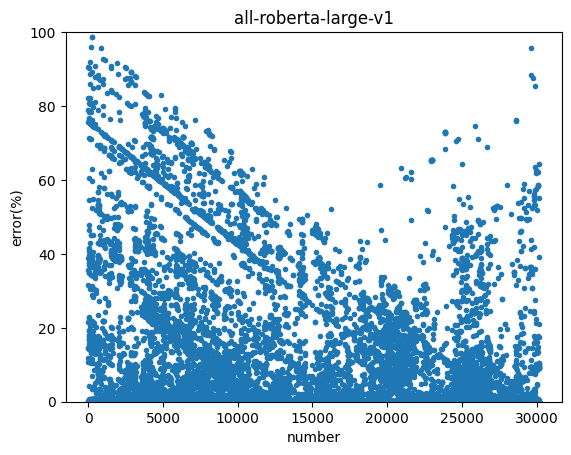

In [132]:
y = [y / len(Comments) * 100 for y in ploty]
plt.plot(plotx, y, '.')
plt.ylim(0, 100)
plt.xlabel("number")
plt.ylabel("error(%)")
plt.title("all-roberta-large-v1")
plt.show()